# 16 - Support Vector Machine (SVC)

*Support Vector Machine or SVM is one of the most popular Supervised Learning algorithms, which is used for Classification as well as Regression problems. However, primarily, it is used for Classification problems in Machine Learning.*

*The goal of the SVM algorithm is to create the best line or decision boundary that can segregate n-dimensional space into classes so that we can easily put the new data point in the correct category in the future. This best decision boundary is called a hyperplane.*

*The C parameter tells the SVM optimization how much you want to avoid misclassifying each training example. For large values of C, the optimization will choose a smaller-margin hyperplane if that hyperplane does a better job of getting all the training points classified correctly. Conversely, a very small value of C will cause the optimizer to look for a larger-margin separating hyperplane, even if that hyperplane misclassifies more points. For very tiny values of C, you should get misclassified examples, often even if your training data is linearly separable.*

*The C parameter is a tuning parameter that controls how much weight we should put on the data points that are incorrectly classified.*

*The higher C,the smaller margin,it might be caused overfitting*

*The lower C,the larger margin,it might included misclassified points and causes soft margin.*

*The gamma parameter defines how far the influence of a single training example reaches, with low values meaning ‘far’ and high values meaning ‘close’. The gamma parameters can be seen as the inverse of the radius of influence of samples selected by the model as support vectors.*

*Low values of Gamma indicate a large similarity radius which results in more points being grouped together.*

*For High values of Gamma, the points need to be very close to each other in order for it to be considered in the same group.*

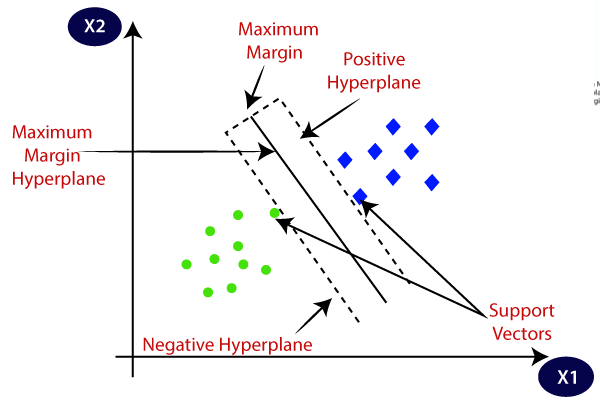

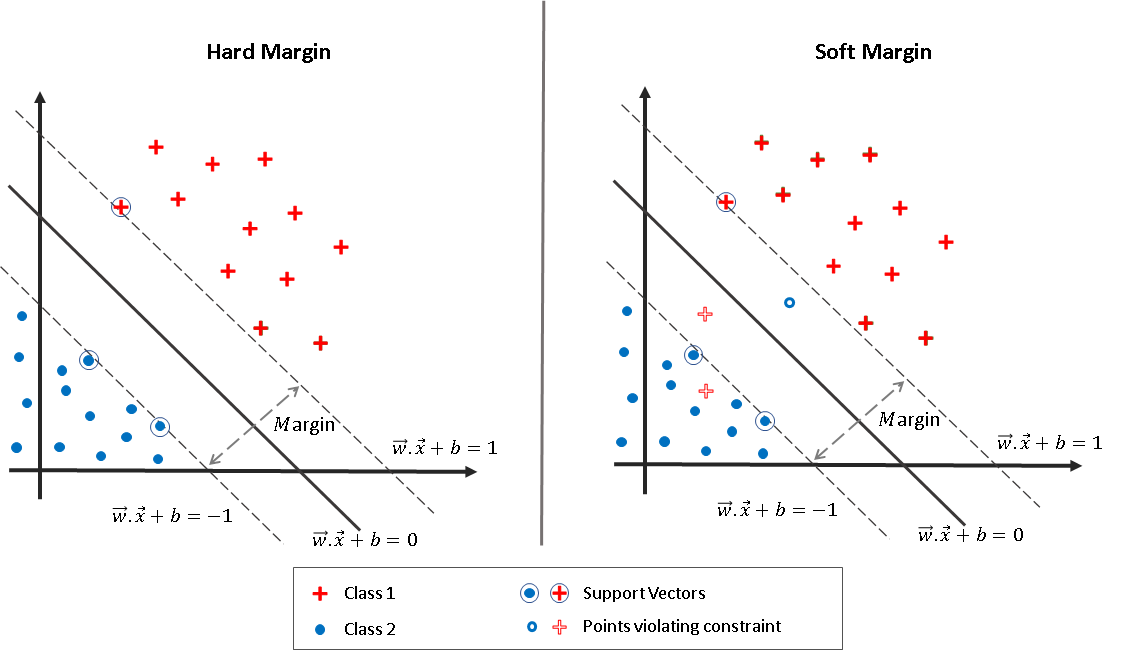

# Linear SVM Formula

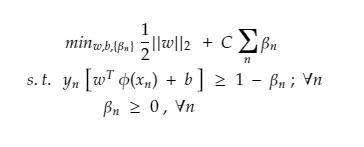

# Hard Margin

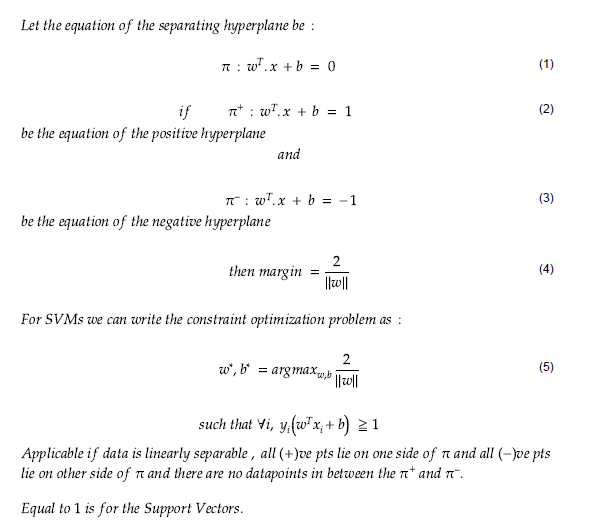

# Soft Margin

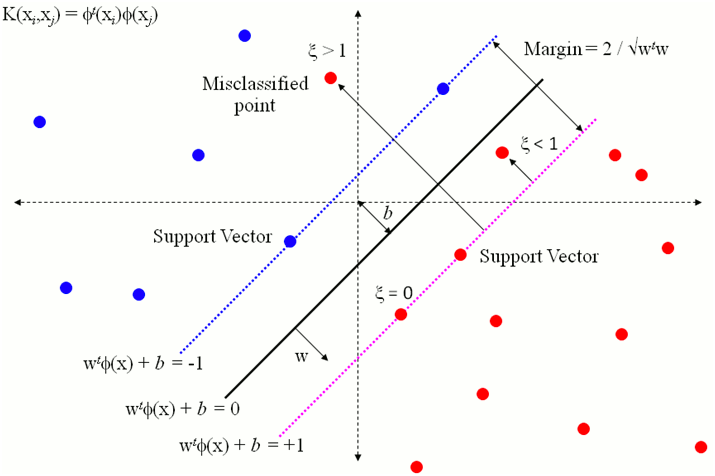

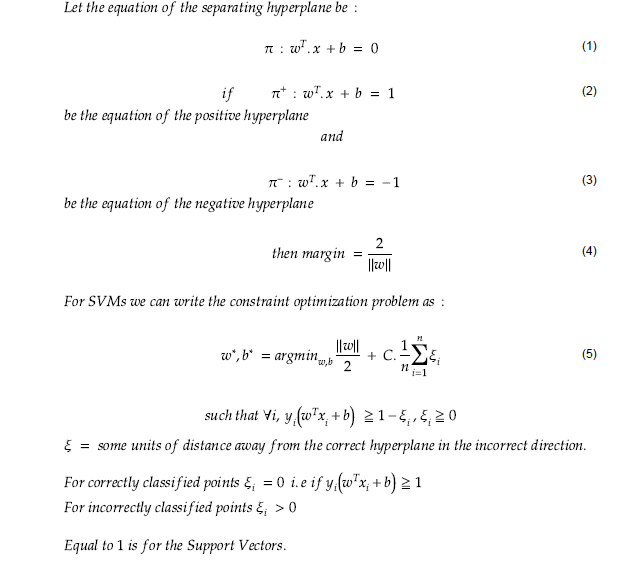

# Get and Prepare Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Get dataset 
df = pd.read_csv("diabetes.csv")
data = df.copy()

# Clear null values
data = data.dropna()

# Declare dependent and independent variables
X = data.drop(["Outcome"],axis=1)
y = data["Outcome"]

# Split train and test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=33)


In [2]:
data["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

<AxesSubplot:xlabel='count', ylabel='Outcome'>

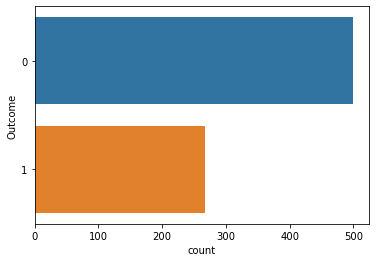

In [3]:
sns.countplot(y="Outcome",data=data)

# Import the Model

In [4]:
from sklearn.svm import SVC

svc = SVC(kernel='linear')
svc.fit(X_train,y_train)

svc.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'linear',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [6]:
from sklearn.metrics import accuracy_score

y_pred = svc.predict(X_test)

print("Test Accuracy Score : %.2f" % (accuracy_score(y_test,y_pred)))

Test Accuracy Score : 0.75


# Model Tuning

In [7]:
from sklearn.model_selection import GridSearchCV

svc = SVC(kernel='linear')
svc_params = {'C':np.arange(1,8)}

svc_cv_model = GridSearchCV(svc,svc_params,cv=10).fit(X_train,y_train)

In [8]:
svc_cv_model.best_params_

{'C': 3}

# Tuned Model

In [9]:
svc_tuned_model = SVC(kernel='linear',C=3).fit(X_train,y_train)

y_pred_tuned = svc_tuned_model.predict(X_test)

print("Tuned Test Accuracy Score : %.2f" % (accuracy_score(y_test,y_pred_tuned)))

Tuned Test Accuracy Score : 0.75


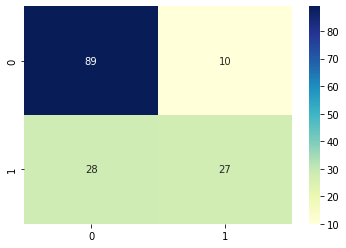

In [11]:
from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(y_test,y_pred_tuned),annot=True,fmt="d",cmap="YlGnBu");

# Radial Basis Function (RBF) SVC

In [12]:
svc_model = SVC(kernel='rbf').fit(X_train,y_train)
svc_model.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

# Model Tuning of RBF SVC 

In [14]:
svc = SVC(kernel = 'rbf')
svc_params = {'C':[1e-5,1e-3,0.1,10,100],
             'gamma':[1e-4,1e-2,0.1,10,100]}

svc_rbf_cv = GridSearchCV(svc,svc_params,cv=10).fit(X_train,y_train)

svc_rbf_cv.best_params_

{'C': 10, 'gamma': 0.0001}

# Tuned Model with RBF SVC

In [ ]:
svc_rbf_tuned = SVC(kernel = "rbf",C=10,gamma=0.0001).fit(X_train,y_train)

y_pred_tuned = svc_rbf_tuned.predict(X_test)

print(f"Tuned Test Accuracy")